# Candy Forecast

## Created By: Dana Hagist

#### Data Source: https://www.kaggle.com/rtatman/us-candy-production-by-month/data

The intent of this analysis is to outline a very simple approach that I sourced from https://www.dataiku.com/learn/guide/code/r/time_series.html.  Following the steps below, one can create a time series analysis in a short time with relatively few lines of code.

Time series analysis can be extremely useful in predictions when the data follows a pattern.  

Furthermore, with some of the packages in R, Python and other languages, you can accomplish a significant amount of analysis without having to write complex functions.

The dataset that we are using comes from Kaggle, and represents candy production from January 1972 to August 2017 as a percent of the inductruial production (IP) index from 2012.

The dataset, as you will see, is a very good fit for these forecasting models.

For this analysis, we will create 3 different models, and I will walk through what each line of code does in the first model.

I will also use the aggregate() function to determine the highest and lowest candy production months.

In [27]:
# Set the working directory to where your data is stored
setwd #Insert working directory between ticks ('')

# Reading in the data and performing basic exploratory analysis
candy <- read.csv('candy_production.csv')
summary(candy)
str(candy)

# Turning the observation date into a date which will help with analysis 
candy$Date = as.Date(candy$observation_date, format= "%Y-%m-%d")

# Creating train and test set for the models
train<-subset(candy, Date>= as.Date("2010-01-01") & Date <= as.Date("2016-12-01"))
test<-subset(candy, Date >= as.Date("2017-01-01"))

# Structure and first rows of train and test
str(train)
head(train)
str(test)
head(test)

   observation_date    IPG3113N     
 1972-01-01:  1     Min.   : 50.67  
 1972-02-01:  1     1st Qu.: 87.86  
 1972-03-01:  1     Median :102.28  
 1972-04-01:  1     Mean   :100.66  
 1972-05-01:  1     3rd Qu.:114.69  
 1972-06-01:  1     Max.   :139.92  
 (Other)   :542                     

'data.frame':	548 obs. of  2 variables:
 $ observation_date: Factor w/ 548 levels "1972-01-01","1972-02-01",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ IPG3113N        : num  85.7 71.8 66 64.6 65 ...
'data.frame':	84 obs. of  3 variables:
 $ observation_date: Factor w/ 548 levels "1972-01-01","1972-02-01",..: 457 458 459 460 461 462 463 464 465 466 ...
 $ IPG3113N        : num  100.4 99 92 89.5 90 ...
 $ Date            : Date, format: "2010-01-01" "2010-02-01" ...


,observation_date,IPG3113N,Date
457,2010-01-01,100.3797,2010-01-01
458,2010-02-01,99.0155,2010-02-01
459,2010-03-01,91.9654,2010-03-01
460,2010-04-01,89.4914,2010-04-01
461,2010-05-01,89.9713,2010-05-01
462,2010-06-01,89.5047,2010-06-01


'data.frame':	8 obs. of  3 variables:
 $ observation_date: Factor w/ 548 levels "1972-01-01","1972-02-01",..: 541 542 543 544 545 546 547 548
 $ IPG3113N        : num  109 113 105 107 102 ...
 $ Date            : Date, format: "2017-01-01" "2017-02-01" ...


,observation_date,IPG3113N,Date
541,2017-01-01,109.4666,2017-01-01
542,2017-02-01,113.4661,2017-02-01
543,2017-03-01,105.2245,2017-03-01
544,2017-04-01,107.4288,2017-04-01
545,2017-05-01,101.9209,2017-05-01
546,2017-06-01,104.2022,2017-06-01


Next thing we will do is load the necessary packages to complete the time series analysis.

The forecast library has the functions necssary for training a time series model, as well as forecasting out of sample.

The dplyr package has packages that are helpful for manipulating dataframes.

In [34]:
# Installing necessary packages for analysis
library(forecast)
library(dplyr)

Now that the data has been loaded and dates have been defined for the dataset, next step is to create the necessary time series objects based on our training set and test set using the ts() function.  

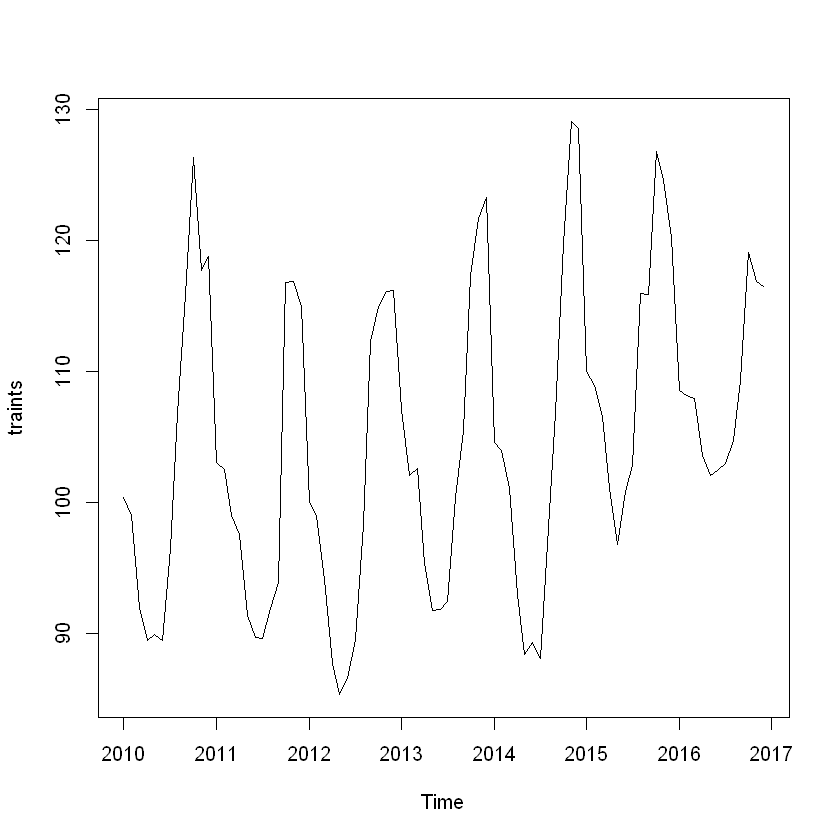

In [37]:
# Creating train and test time series
#  Each takes the series to be forecasted, as well as start date and frequency.
traints = ts(train$IPG3113N, start=2010, frequency=12)
testts = ts(test$IPG3113N, start=2017, frequency=12)

# Look at simple plot of our time series object
plot(traints)

### Ready for Modeling

Now that we have our time series objects created, we can go ahead and start modeling.

For our purposes, as stated before, we are going to train three models and then determine which one is the most preferable based on a standard and commonly utilized test.

Each of the models are created using similar steps.  Each model takes only one paramter as an input, which is the time series object you are looking for forecast.  In our case, this is the traints dataframe.  

From there, the forecast() function will take your model and your forecasting horizon as an input.  

Then, you can pass your forecast model into the plot() function.

I will show each of these steps for the first model.

### Model 1: Exponential State Smoothing

The ets() function in the forecast packiage fits exponential state smoothing (ETS) models.  This function automatically optimizes the choice of model and necessary parameters.  All you have to do is provide the time series.

We use this function below to create a forecast for 24 months from the end of 2016.

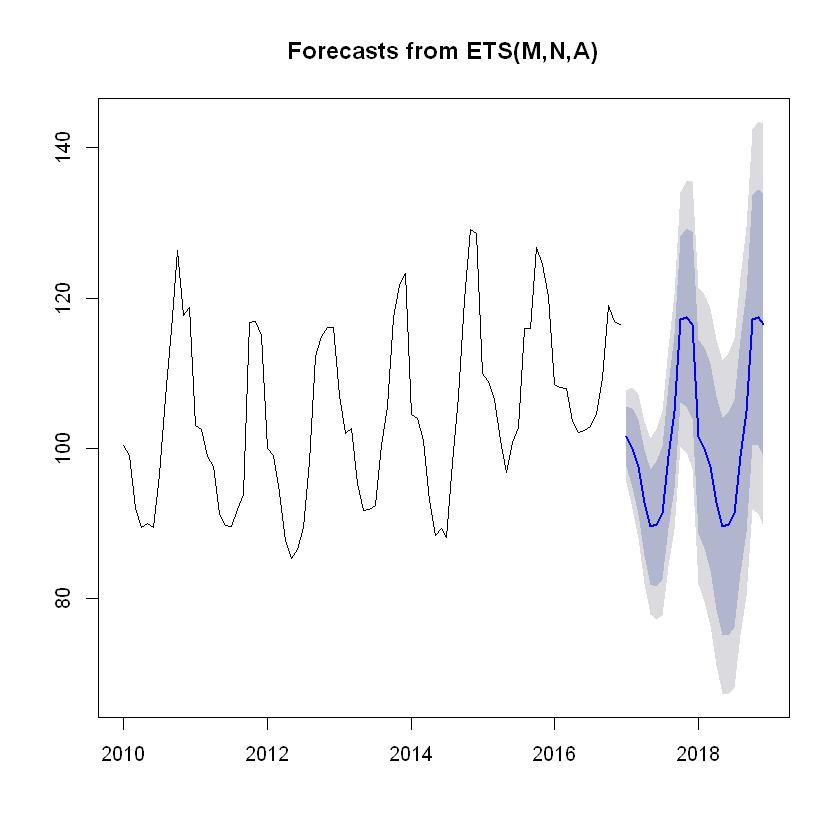

In [38]:
# Step 1: Call the model function and pass in the timeseries, traints.
m_ets = ets(traints)

# Step 2: Pass your model and forecast horizon in, m_ets and 24 months, respectively.
f_ets = forecast(m_ets, h=24) # forecast 24 months into the future

# Step 3: Pass in your forecast to the plot function to display.
plot(f_ets)

In [39]:
# Point estimates and confidence intervals for this forecast
f_ets

         Point Forecast     Lo 80     Hi 80     Lo 95    Hi 95
Jan 2017      101.62429  97.62193 105.62665  95.50320 107.7454
Feb 2017      100.04022  94.75374 105.32670  91.95525 108.1252
Mar 2017       97.53040  91.26734 103.79346  87.95187 107.1089
Apr 2017       92.78638  85.76597  99.80678  82.04960 103.5232
May 2017       89.59052  81.92469  97.25634  77.86665 101.3144
Jun 2017       89.91454  81.63539  98.19369  77.25267 102.5764
Jul 2017       91.37563  82.50311 100.24815  77.80628 104.9450
Aug 2017       98.86419  89.32357 108.40481  84.27307 113.4553
Sep 2017      104.84830  94.61465 115.08195  89.19729 120.4993
Oct 2017      117.12414 106.06781 128.18047 100.21494 134.0333
Nov 2017      117.42399 105.63724 129.21075  99.39771 135.4503
Dec 2017      116.42075 103.96124 128.88027  97.36557 135.4759
Jan 2018      101.62429  88.71546 114.53312  81.88194 121.3666
Feb 2018      100.04022  86.67325 113.40719  79.59720 120.4832
Mar 2018       97.53040  83.74399 111.31681  76.44591 1

The model above does appear to provide a forecast that aligns relatively well from a pattern standpoint with historical patterns.  However, it is clear that some of the nuanced variation is smoothed, which could hurt our estimates.

### Model 2: ARIMA

The auto.arima() function provides another modeling method, called an autoregressive integrated moving average.  This function also searches for the optimal model and parameters.  It is generally advisable to use this function rather than calling the Arima() function directly due to the ease of use from a model specification standpoint.

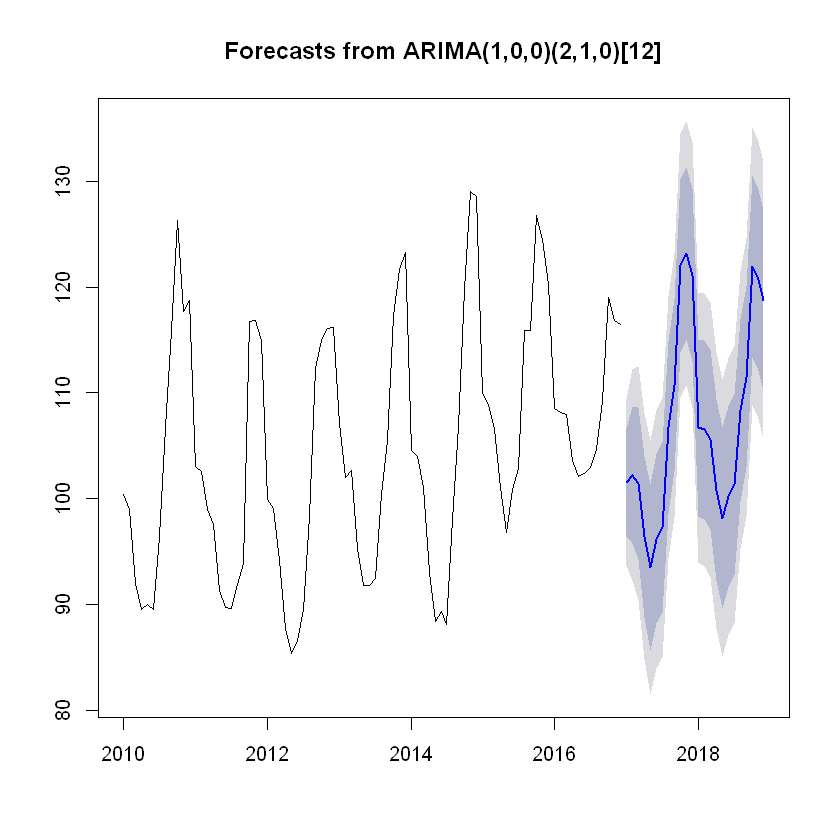

In [40]:
m_aa = auto.arima(traints)
f_aa = forecast(m_aa, h=24)
plot(f_aa)

In [42]:
# Point estimates and confidence interval
f_aa

         Point Forecast     Lo 80    Hi 80     Lo 95    Hi 95
Jan 2017      101.53901  96.40838 106.6696  93.69239 109.3856
Feb 2017      102.23526  95.73137 108.7391  92.28842 112.1821
Mar 2017      101.42945  94.21848 108.6404  90.40122 112.4577
Apr 2017       96.42071  88.81255 104.0289  84.78503 108.0564
May 2017       93.47418  85.63474 101.3136  81.48480 105.4636
Jun 2017       96.18295  88.20642 104.1595  83.98389 108.3820
Jul 2017       97.28597  89.22736 105.3446  84.96139 109.6106
Aug 2017      106.75181  98.64378 114.8598  94.35165 119.1520
Sep 2017      110.70738 102.56951 118.8453  98.26158 123.1532
Oct 2017      122.02160 113.86567 130.1775 109.54817 134.4950
Nov 2017      123.17375 115.00687 131.3406 110.68359 135.6639
Dec 2017      121.11962 112.94611 129.2931 108.61931 133.6199
Jan 2018      106.69774  98.36024 115.0352  93.94664 119.4488
Feb 2018      106.49810  98.06264 114.9336  93.59717 119.3990
Mar 2018      105.58529  97.09091 114.0797  92.59425 118.5763
Apr 2018

This seems to be a little bit of a better fit of the historical fluctuation  than the ETS model we looked at before.  We will train one more model for comparison.

### Model 3: TBATS

Last model we will look at is the TBATS model, which can help if there are complicated patterns in your time series that your other models may not be picking up.  An example would be if the data exhibited multiple cyclic patterns (e.g. daily, weekly and yearly seasonality)

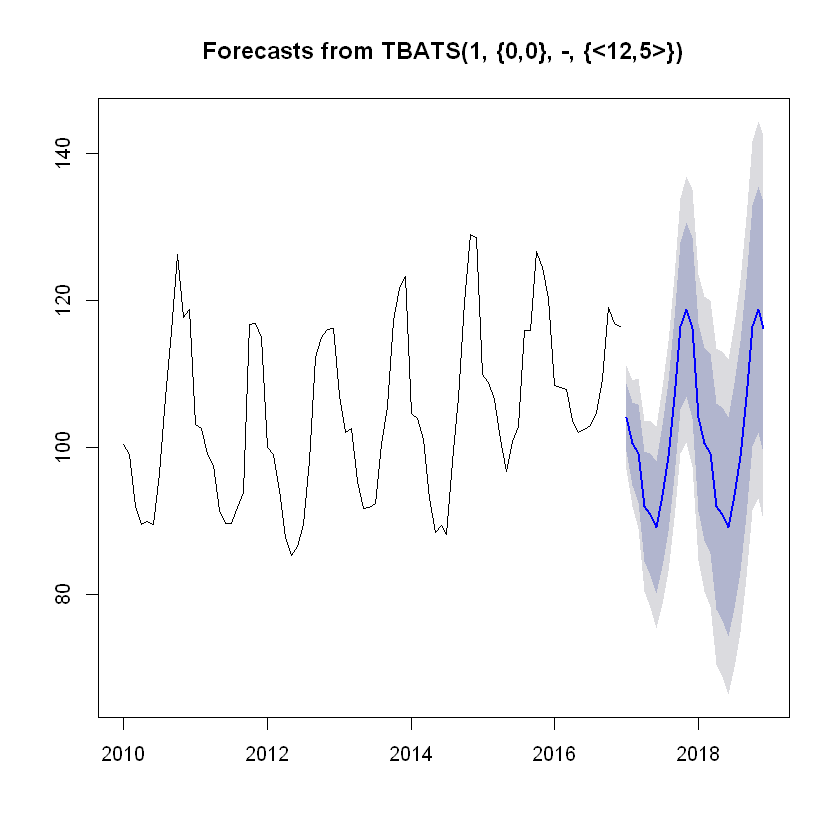

In [43]:
m_tbats = tbats(traints)
f_tbats = forecast(m_tbats, h=24)
plot(f_tbats)

In [44]:
# Point estimates and confidence intervals
f_tbats

         Point Forecast     Lo 80     Hi 80     Lo 95    Hi 95
Jan 2017      104.07745  99.42076 108.73413  96.95566 111.1992
Feb 2017      100.51900  94.89037 106.14763  91.91076 109.1272
Mar 2017       99.16310  92.47828 105.84792  88.93955 109.3866
Apr 2017       91.98478  84.44830  99.52125  80.45874 103.5108
May 2017       90.92301  82.62392  99.22211  78.23065 103.6154
Jun 2017       89.13890  80.13964  98.13815  75.37572 102.9021
Jul 2017       93.40795  83.77364 103.04226  78.67354 108.1424
Aug 2017       98.75071  88.50710 108.99433  83.08446 114.4170
Sep 2017      106.80946  96.01184 117.60709  90.29592 123.3230
Oct 2017      116.50509 105.16047 127.84971  99.15500 133.8552
Nov 2017      118.76142 106.92424 130.59859 100.65802 136.8648
Dec 2017      116.24391 103.90575 128.58208  97.37431 135.1135
Jan 2018      104.07745  91.31895 116.83595  84.56500 123.5899
Feb 2018      100.51900  87.37457 113.66343  80.41633 120.6217
Mar 2018       99.16310  85.53293 112.79327  78.31756 1

### Model Comparison

We will use the Akaike information criterion (AIC) test to compare the different models.  AIC is a very common method for determining how well a model fits the data, while penalizing more complex models.  The model with the smallest AIC is generally the most preferable model from a statistical soundness standpoint.  However, it's important to consider how well the model fits your data.

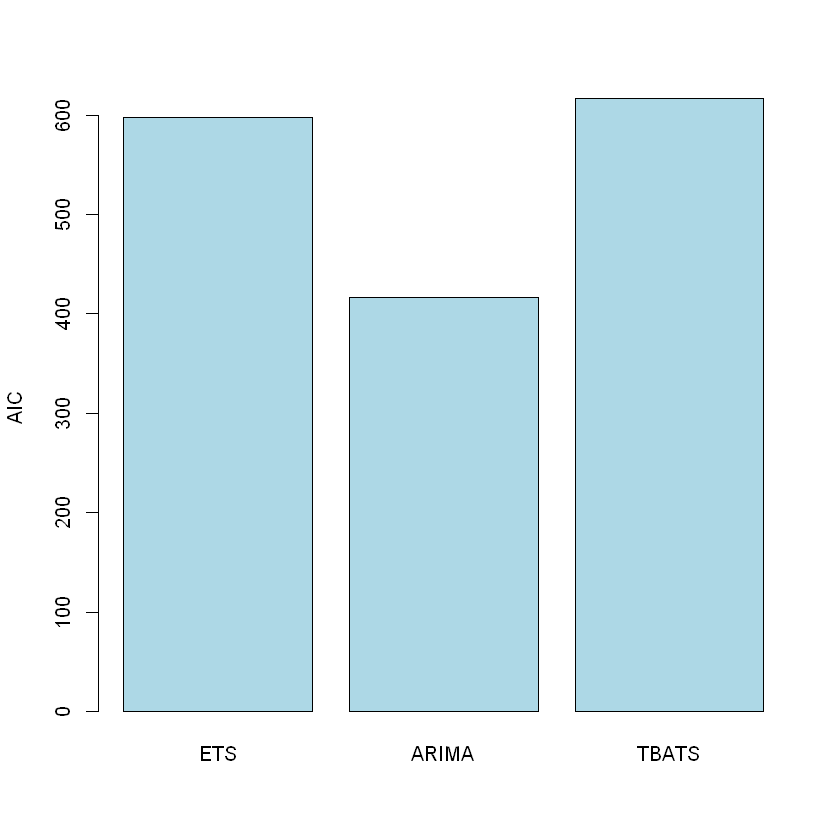

In [45]:
barplot(c(ETS=m_ets$aic, ARIMA=m_aa$aic, TBATS=m_tbats$AIC),col="light blue",ylab="AIC")

The above barplot suggests that the ARIMA model is the most preferable in this case.  Next, we can look at how well our data fit the actuals/test set for the time period after the end of the training set.

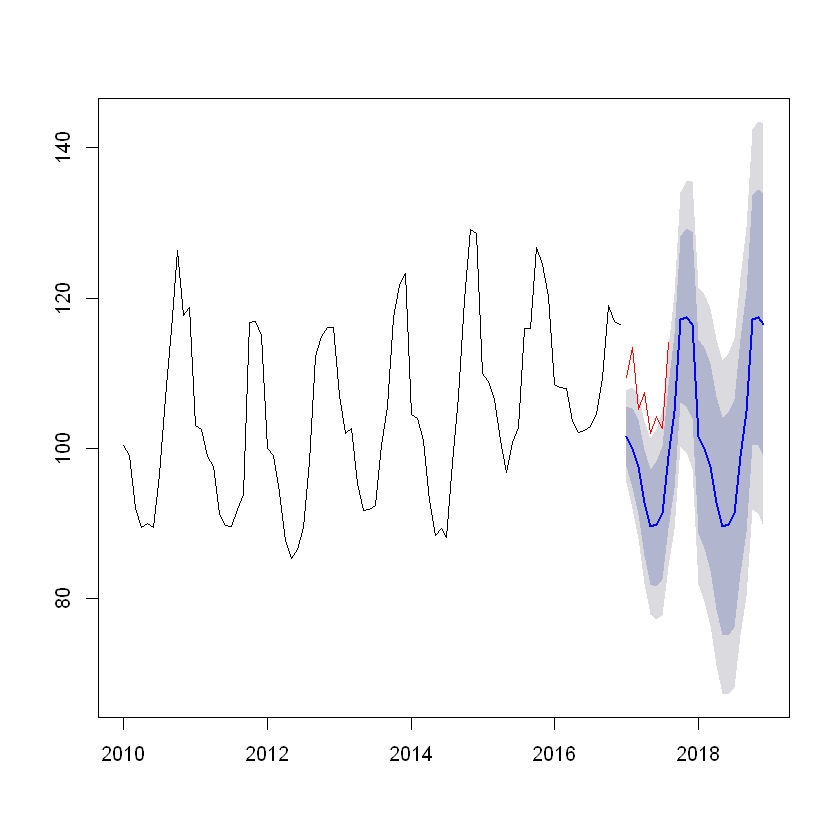

In [46]:
# Plot of ETS against actuals
plot(f_ets, main=" ")
lines(testts, col='red')

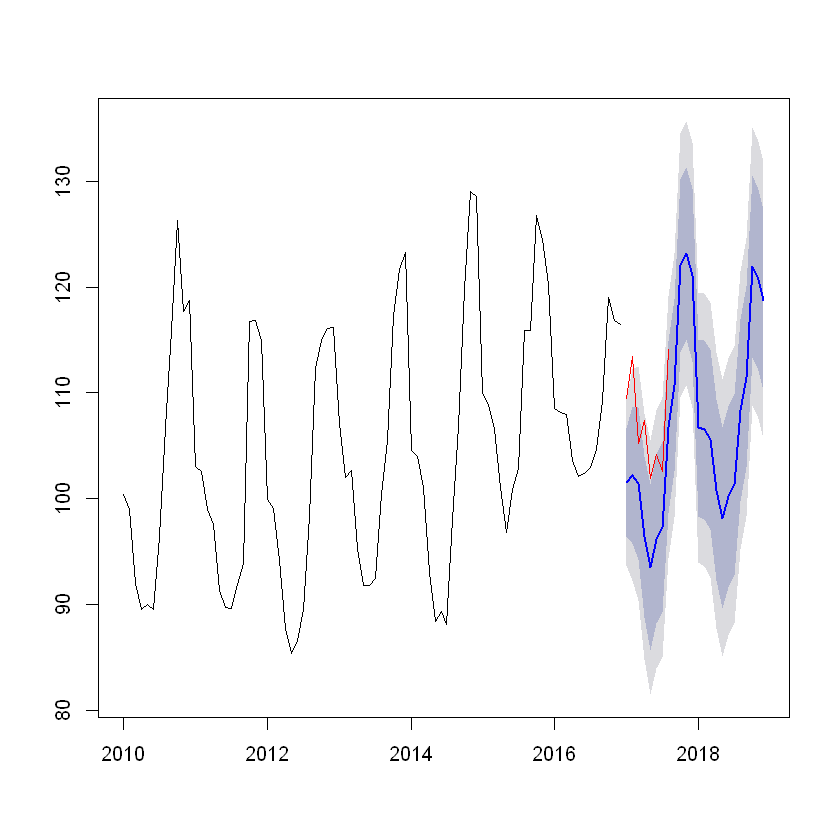

In [47]:
# Plot of ETS against actuals
plot(f_aa, main=" ")
lines(testts, col='red')

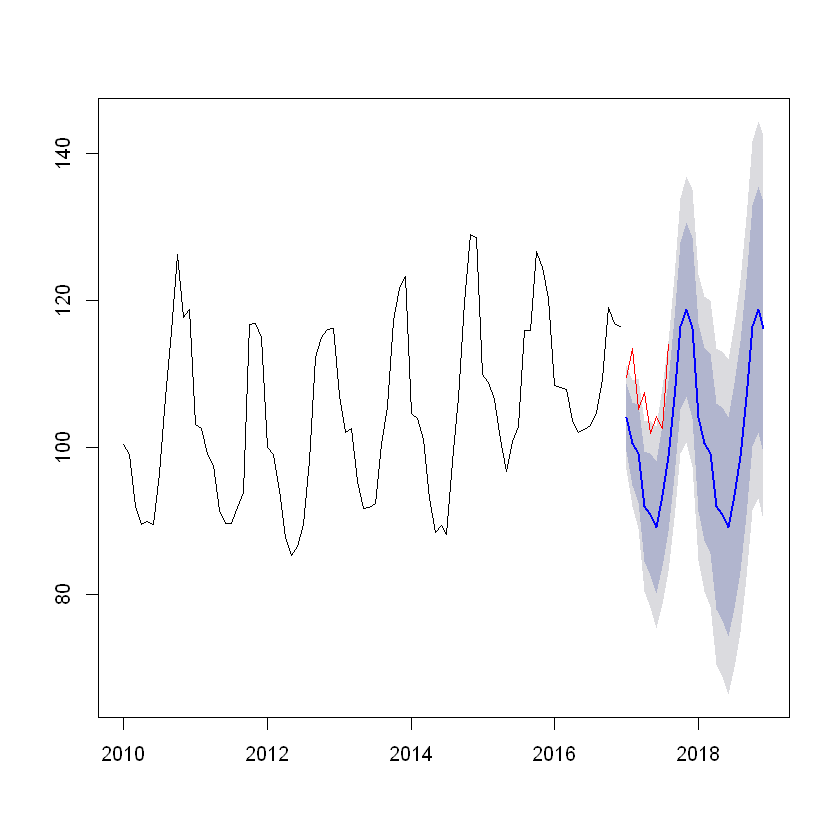

In [48]:
# Plot of ETS against actuals
plot(f_tbats, main=" ")
lines(testts, col='red')

Based on an analysis of each of the plots above, it appears that 2017 did not generally fit the historical pattern.  Sales were slightly higher than the pattern would suggest based on data from 2010 through 2016.  However, the actuals are at the top end of the 95% confidence interval for each.  

It is possible that the choice of training set could be revisited if it appears that the test data has reached a new and higher normal/mean.

Last step for this analysis will be to look at which months have the highest and lowest candy production historically.

### Highs and Lows of Candy Production

In the code cell below, we will seek to understand how candy production changes over the course of the year.

We will point out the highest and lowest months of production.

In [60]:
# Creating Month object to group by
candy$Mon = format(candy$Date, format= "%m")
str(candy$Mon)

# Aggregate function to find mean candy production by month
candy_Mons <- aggregate(x=candy$IPG3113N, by=list(candy$Mon), FUN=mean)
candy_Mons

 chr [1:548] "01" "02" "03" "04" "05" "06" "07" "08" "09" "10" "11" "12" ...


Group.1,x
01,103.18784
02,99.25708
03,92.75588
04,88.66798
05,88.83878
06,90.75027
07,89.56786
08,95.76317
09,100.80413
10,118.69989


The above table suggests that for the entire data set, mean candy production is the highest the last 3 months of the year.

Candy prouction is the lowest in the Spring and Summer months.

This makes sense as production likely peaks around holidays like Halloween, Christmas, and Valentines Day.